In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw_bar(result,y,title,legend=True):

    param1 = list(result.keys())

    values = [result[param] if isinstance(result[param], float) else result[param]['0'] for param in param1]

    print(param1,values)
    param2 = list(result['0.001'].keys())

    fig, ax = plt.subplots(figsize=(6,4.6))
    width = 0.2  # the width of the bars
    colors = ['#FFA07A', '#66CDAA', '#D8BFD8', '#87CEEB']
    rects1 = ax.bar(0, result['0'], width, color=colors[0])


    x = np.arange(1,len(param1))
    print(x)
    pos =[-1.5,-0.5,0.5,1.5]

    for i, p2 in enumerate(param2):
        values=[]
        for p1 in param1:
            if p1=='0':
                continue
            values.append(result[p1][p2])
        
        ax.bar(x + pos[i] * width, values, width, label='$\lambda_2$='+p2, color=colors[i])

    # Add labels, title, and legend
    ax.set_xlabel('$\lambda_1$',fontsize=15)
    ax.set_ylabel('HR@50',fontsize=15)
    ax.set_title(title,fontsize=16)
    if len(y)>0:
        ax.set_ylim(y[0],y[1])
    ax.set_xticks(np.arange(len(param1)),param1,fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    if legend:
        ax.legend(ncol=2,fontsize=15)

    plt.show()

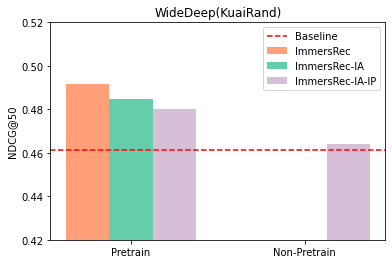

In [33]:
# HR@50
result_Kuai_WideDeep={
    'baseline': 0.4614,
    'pretrain':{
    'ImmersRec': 0.4916,
    'ImmersRec-IA': 0.4848,
    'ImmersRec-IA-IP': 0.4800
    },
    'non-pretrain':{
    'ImmersRec': 0,
    'ImmersRec-IA': 0,
    'ImmersRec-IA-IP': 0.4639
    }
}

baseline = result_Kuai_WideDeep['baseline']
pretrain_data = list(result_Kuai_WideDeep['pretrain'].values())
non_pretrain_data = list(result_Kuai_WideDeep['non-pretrain'].values())
models = list(result_Kuai_WideDeep['pretrain'].keys())

colors =['#FFA07A', '#66CDAA', '#D8BFD8']

fig, ax = plt.subplots()
bar_width = 0.25

ax.axhline(y=baseline, color='r', linestyle='--', label='Baseline')


position = [-bar_width, 0, bar_width]

for i, color in zip(range(len(models)), colors):
    ax.bar(1+position[i], pretrain_data[i], bar_width, label=models[i], color=color)

for i, color in zip(range(len(models)), colors):
    ax.bar(2+position[i], non_pretrain_data[i], bar_width, color=color)

ax.set_ylabel('HR@50')
ax.set_title('WideDeep(KuaiRand)')
ax.set_xticks([1,2])
ax.set_xticklabels(['Pretrain', 'Non-Pretrain'])
ax.set_ylim(0.42,0.52)

ax.legend()

plt.show()

In [ ]:
# HR@50
result_Kuai_WideDeep={
    'baseline': 0.4614,
    'ImmersRec-IA-IP': 0.4800,
    'ImmersRec-IA': 0.4848,
    'ImmersRec': 0.4916
}

fig, ax = plt.subplots(figsize=(4.2,4))

ax.axhline(y=result_Kuai_WideDeep['baseline'], color='red', linestyle='--', label='baseline')

methods = list(result_Kuai_WideDeep.keys())[1:]
values = list(result_Kuai_WideDeep.values())[1:]
colors = ['#FFA07A', '#66CDAA', '#D8BFD8'] # '#D8BFD8'
ax.bar(methods, values, color=colors, width=0.5,alpha=0.7)

# for i, v in enumerate(values):
#     ax.text(i, v + 0.005, str(round(v, 4)), ha='center', va='bottom', fontsize=16)

# ax.set_title('WideDeep')
ax.set_ylabel('HR@50',fontsize=14)
ax.set_ylim(0.44,0.53)

ax.set_xticklabels(['Ours','Ours-IA','Ours-IA-IP'])
ax.legend(fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
# ax.set_title('ImmersRec(WideDeep),KuaiRand', fontsize=16)
plt.savefig('Kuai_WideDeep_ablation.pdf')
plt.show()

['0', '0.001', '0.01', '0.1'] [0.4285, 0.4271, 0.3893, 0.4231]
[1 2 3]


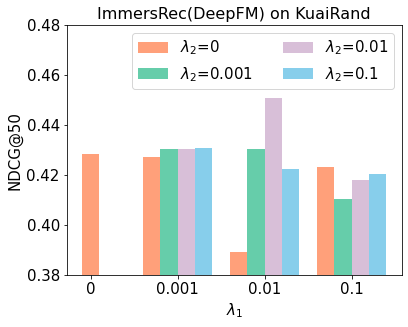

In [34]:
# HR@50
result_Kuai_DeepFM={
    '0': 0.4285, 
    '0.001':{'0':0.4271,'0.001':0.4306,'0.01':0.4303,'0.1':0.4307},
    '0.01':{'0':0.3893,'0.001':0.4304,'0.01':0.4508,'0.1':0.4224},
    '0.1':{'0':0.4231,'0.001':0.4106,'0.01':0.4182,'0.1':0.4206}
}
draw_bar(result_Kuai_DeepFM,[0.38,0.48],'ImmersRec(DeepFM) on KuaiRand')

In [ ]:
# HR@50
result_Kuai_FinalMLP={
    'baseline': 0.5066,
    'ImmersRec-IA-IP': 0.5077,
    'ImmersRec-IA': 0.5114,
    'ImmersRec': 0.5144
}
fig, ax = plt.subplots(figsize=(4.2,4))

ax.axhline(y=result_Kuai_FinalMLP['baseline'], color='red', linestyle='--', label='baseline')

methods = list(result_Kuai_FinalMLP.keys())[1:]
values = list(result_Kuai_FinalMLP.values())[1:]
colors = ['#FFA07A', '#66CDAA', '#D8BFD8'] # '#D8BFD8'
ax.bar(methods, values, color=colors, width=0.5,alpha=0.7)

# for i, v in enumerate(values):
#     ax.text(i, v + 0.005, str(round(v, 4)), ha='center', va='bottom', fontsize=16)

# ax.set_title('WideDeep')
ax.set_ylabel('HR@50',fontsize=14)
ax.set_ylim(0.44,0.53)

ax.set_xticklabels(['Ours','Ours-IA','Ours-IA-IP'])
ax.legend(fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('Kuai_FinalMLP_ablation.pdf')
plt.show()

In [ ]:
# HR@50
result_MV_WideDeep={
    'baseline': 0.4417,  # 0.4505
    'ImmersRec-IA-IP': 0.4451,
    'ImmersRec-IA': 0.4484,
    'ImmersRec': 0.4526
}

fig, ax = plt.subplots(figsize=(4.2,4))

ax.axhline(y=result_MV_WideDeep['baseline'], color='red', linestyle='--', label='baseline')

methods = list(result_MV_WideDeep.keys())[1:]
values = list(result_MV_WideDeep.values())[1:]
colors = ['#FFA07A', '#66CDAA', '#D8BFD8'] # '#D8BFD8'
ax.bar(methods, values, color=colors, width=0.5,alpha=0.7)

# for i, v in enumerate(values):
#     ax.text(i, v + 0.005, str(round(v, 4)), ha='center', va='bottom', fontsize=16)

# ax.set_title('WideDeep')
ax.set_ylabel('HR@50',fontsize=14)
ax.set_ylim(0.40,0.48)

ax.set_xticklabels(['Ours','Ours-IA','Ours-IA-IP'])
ax.legend(fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('MicroVideo_WideDeep_ablation.pdf')
plt.show()

In [ ]:
# HR@50

result_MV_FinalMLP={
    'baseline': 0.4517,
    'ImmersRec-IA-IP': 0.4341,
    'ImmersRec-IA': 0.4581,
    'ImmersRec': 0.4631,
}
fig, ax = plt.subplots(figsize=(4.2,4))

ax.axhline(y=result_MV_FinalMLP['baseline'], color='red', linestyle='--', label='baseline')

methods = list(result_MV_FinalMLP.keys())[1:]
values = list(result_MV_FinalMLP.values())[1:]
colors = ['#FFA07A', '#66CDAA', '#D8BFD8'] # '#D8BFD8'
ax.bar(methods, values, color=colors, width=0.5,alpha=0.7)

# for i, v in enumerate(values):
#     ax.text(i, v + 0.005, str(round(v, 4)), ha='center', va='bottom', fontsize=16)

# ax.set_title('WideDeep')
ax.set_ylabel('HR@50',fontsize=14)
ax.set_ylim(0.40,0.48)

ax.set_xticklabels(['Ours','Ours-IA','Ours-IA-IP'])
ax.legend(fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('MicroVideo_FinalMLP_ablation.pdf')
plt.show()